In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url='http://nagyvofely.hu/Budapest/irszam'
res = requests.get(url)
res = BeautifulSoup(res.content,'lxml')

data = res.findAll('fieldset')

In [3]:
postal_code=[d.find('a').text for d in data]
district=[d.find('a')['title'].replace(' ', '').split(',')[1].split('.')[0] for d in data]

In [4]:
df=pd.DataFrame()
df['PostalCode']=postal_code
df['Neighborhood']=district
df.tail(10)

,PostalCode,Neighborhood
151,1214,XXI
152,1215,XXI
153,1221,XXII
154,1222,XXII
155,1223,XXII
156,1224,XXII
157,1225,XXII
158,1237,XXIII
159,1238,XXIII
160,1239,XXIII


In [5]:
url_temp='https://xn--irnytszmok-t4af6mnd.cybo.com/magyarorsz%C3%A1g/postal_budapest-x.-ker%C3%BClet/'

lat=[]
lon=[]
for postal in df['PostalCode']:
    url=url_temp.replace('postal', str(postal))
    res = requests.get(url)
    res = BeautifulSoup(res.content,'lxml')

    table=res.find('table')
    rows=table.findAll('tr')

    for r in rows:
        cells=r.findAll('td')
        if cells[0].text=='Koordináták':
            coords=cells[1].text.split('/')
            lat.append(coords[0].replace('°','').replace(' ', ''))
            lon.append(coords[1].replace('°','').replace(' ',''))

In [6]:
df['Borough.Latitude']=lat
df['Borough.Longitude']=lon
df.head()

,PostalCode,Neighborhood,Borough.Latitude,Borough.Longitude
0,1011,I,47.50730454130059,19.03893593192484
1,1012,I,47.4997356790391,19.02816805968499
2,1013,I,47.49458714651173,19.040202587219362
3,1014,I,47.50245452032449,19.031893910668916
4,1015,I,47.505254105173194,19.03310818237037


In [7]:
url='https://en.m.wikipedia.org/wiki/List_of_districts_in_Budapest'

#res=requests.get(url)
#res=BeautifulSoup(res.content, 'lxml')
#table=res.find('table')
df2=pd.read_html(url, skiprows=1)[0]
df2.head()

,0,1,2,3
0,I.,Várkerület(Castle District),"Buda Castle, Tabán, Gellérthegy, Krisztinaváro...","Buda Castle, Matthias Church, Hungarian Nation..."
1,II.,none,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ...","Tomb of Gül Baba, Mechwart Park, Cave of Szeml..."
2,III.,Óbuda-Békásmegyer,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill...","Ruins of Aquincum, Aquincum Military Amphithea..."
3,IV.,Újpest(New Pest),"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I...","Queen of Heavens Church, Synagogue of Újpest, ..."
4,V.,Belváros-Lipótváros(Inner City-Leopold Town),"Inner City, Lipótváros","Parliament, Hungarian Academy of Sciences, Gre..."


In [8]:
df3=pd.DataFrame() 
df3['Neighborhood']=df2[0].apply(lambda x: x.replace('.','').replace(' kerület',''))
df3['Borough']=df2[2]
df3.drop(df3.index[-1], inplace=True)
df3.head()

,Neighborhood,Borough
0,I,"Buda Castle, Tabán, Gellérthegy, Krisztinaváro..."
1,II,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ..."
2,III,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill..."
3,IV,"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I..."
4,V,"Inner City, Lipótváros"


In [9]:
coords='47.4979° N, 19.0402° E, 47.5393° N, 18.9869° E, 47.5672° N, 19.0369° E, 47.5649° N, 19.0913° E, 47.5002° N, 19.0520° E, 47.5099° N, 19.0626° E, 47.5027° N, 19.0734° E, 47.4894° N, 19.0707° E, 47.4649° N, 19.0916° E, 47.4833° N, 19.1573° E, 47.4593° N, 19.0187° E, 47.4991° N, 18.9905° E, 47.5355° N, 19.0709° E, 47.5225° N, 19.1147° E, 47.5589° N, 19.1193° E, 47.5183° N, 19.1919° E, 47.4803° N, 19.2667° E, 47.4281° N, 19.2098° E, 47.4457° N, 19.1430° E, 47.4333° N, 19.1193° E, 47.4244° N, 19.0661° E, 47.4250° N, 19.0317° E, 47.3940° N, 19.1225° E'
coords=coords.replace('° E', '').replace('° N', '').split(', ')
df3['Neighborhood.Latitude']=coords[::2]
df3['Neighborhood.Longitude']=coords[1::2]
df3

,Neighborhood,Borough,Neighborhood.Latitude,Neighborhood.Longitude
0,I,"Buda Castle, Tabán, Gellérthegy, Krisztinaváro...",47.4979,19.0402
1,II,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ...",47.5393,18.9869
2,III,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill...",47.5672,19.0369
3,IV,"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I...",47.5649,19.0913
4,V,"Inner City, Lipótváros",47.5002,19.0520
5,VI,Terézváros,47.5099,19.0626
6,VII,Erzsébetváros,47.5027,19.0734
7,VIII,"Józsefváros, Kerepesdűlő, Tisztviselőtelep",47.4894,19.0707
8,IX,"Ferencváros, Gubacsidűlő, József Attila-lakótelep",47.4649,19.0916
9,X,"Felsőrákos, Gyárdűlő, Keresztúridűlő, Kőbánya-...",47.4833,19.1573


In [10]:
merged = pd.merge(left=df3, right=df, left_on='Neighborhood', right_on='Neighborhood')
merged.tail()

,Neighborhood,Borough,Neighborhood.Latitude,Neighborhood.Longitude,PostalCode,Borough.Latitude,Borough.Longitude
156,XXII,"Budatétény, Nagytétény, Budafok",47.4250,19.0317,1224,47.41272556201547,18.981238523749276
157,XXII,"Budatétény, Nagytétény, Budafok",47.4250,19.0317,1225,47.3914886662968,18.97916949242869
158,XXIII,Soroksár,47.3940,19.1225,1237,47.41893101854791,19.120036680983922
159,XXIII,Soroksár,47.3940,19.1225,1238,47.387640049162016,19.14947643654811
160,XXIII,Soroksár,47.3940,19.1225,1239,47.3859041254757,19.11623283473755


In [11]:
!pip install folium
import folium

In [12]:
bp_lat='47.48'
bp_lon='19.13'

line_points=[
    (47.3850,19.0320),
    (47.5850,19.0580)
]

map=folium.Map(location=[bp_lat, bp_lon], zoom_start=11)

folium.PolyLine(line_points, color='blue', weight=5, opacity=1).add_to(map)

folium.map.Marker(
    [47.5850, 19.0200],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Buda</b>'
        )
    ).add_to(map)
folium.map.Marker(
    [47.5850, 19.0600],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Pest</b>',
        )
    ).add_to(map)

for lat, lon, label in zip(df3['Neighborhood.Latitude'], df3['Neighborhood.Longitude'], df3['Neighborhood']):
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon], 
        radius=5,
        color='red',
        popup=label,
        fill=True,
        fill_color='#500000',
        fill_opacity=0.7,
        parse_html=False).add_to(map)

map

In [13]:
CLIENT_ID='YOUR_ID'
CLIENT_SECRET='YOUR_SECRET'
VERSION='20180605'
LIMIT=100
RADIUS=500

In [14]:
# The code was removed by Watson Studio for sharing.

In [15]:
def getNearbyVenues(names, lats, lons):
    list=[]
    for n, la, lo in zip(names, lats, lons):
        url= 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, la, lo, RADIUS, LIMIT)
        results= requests.get(url).json()['response']['groups'][0]['items']
        list.append([(
         n, 
         la, 
         lo, 
         v['venue']['name'], 
         v['venue']['location']['lat'], 
         v['venue']['location']['lng'], 
         v['venue']['categories'][0]['name']) for v in results]
        )
    
    nearby=pd.DataFrame([item for vlist in list for item in vlist])
    nearby.columns=[
     'Neighborhood',
     'Neighborhood Latitude', 
     'Neighborhood Longitude',
     'Venue',
     'Venue Latitude',
     'Venue Longitude', 
     'Venue Category'
    ]

    return(nearby)

In [16]:
venues=getNearbyVenues(
  names=df3['Neighborhood'],
  lats=df3['Neighborhood.Latitude'],
  lons=df3['Neighborhood.Longitude']
)
print(venues.shape)

(514, 7)


In [17]:
onehot=pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
onehot['Neighborhood']=venues['Neighborhood']
fixed_columns=[onehot.columns[-1]]+list(onehot.columns[:-1])
onehot=onehot[fixed_columns]
grouped=onehot.groupby('Neighborhood').mean().reset_index()
print(grouped.shape)

(23, 160)


In [18]:
def most_common_venues(row, top):
    row_categories=row.iloc[1:]
    row_categories_sorted= row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:top]

In [19]:
import numpy as np

In [20]:
top=10
indicators=['st', 'nd', 'rd']
columns=['Neighborhood']
for ind in np.arange(top):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicator[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

sorted=pd.DataFrame(columns=columns)
sorted['Neighborhood']=grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    sorted.iloc[ind, 1:]=most_common_venues(grouped.iloc[ind, :],top)

sorted.head()

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,I,Hungarian Restaurant,Pub,Hotel,Bar,Café,Scenic Lookout,Plaza,Historic Site,French Restaurant,Steakhouse
1,II,Park,Playground,Track,Yoga Studio,Ethiopian Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant
2,III,Baseball Field,Heliport,Dog Run,Train Station,Yoga Studio,Fried Chicken Joint,French Restaurant,Fountain,Food & Drink Shop,Food
3,IV,Park,Dessert Shop,Pharmacy,Bakery,Concert Hall,Café,Stationery Store,Mexican Restaurant,Fast Food Restaurant,Farmers Market
4,IX,Train Station,Construction & Landscaping,Office,Yoga Studio,Falafel Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant


In [21]:
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

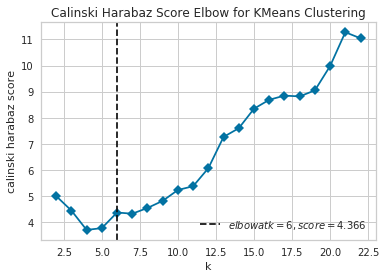

In [34]:
clustering=grouped.drop('Neighborhood', 1)

visualizer = KElbowVisualizer(KMeans(), k=(2,23), metric='calinski_harabasz', timings=False)
visualizer.fit(clustering)
visualizer.show() 

In [23]:
k=6
kmeans=KMeans(n_clusters=k, random_state=0)
kmeans.fit(clustering)

clustered=sorted
clustered.insert(0,'Cluster Labels', kmeans.labels_)

merged=df3
merged=merged.join(sorted.set_index('Neighborhood'), on='Neighborhood')
merged

,Neighborhood,Borough,Neighborhood.Latitude,Neighborhood.Longitude,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,I,"Buda Castle, Tabán, Gellérthegy, Krisztinaváro...",47.4979,19.0402,2,Hungarian Restaurant,Pub,Hotel,Bar,Café,Scenic Lookout,Plaza,Historic Site,French Restaurant,Steakhouse
1,II,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ...",47.5393,18.9869,0,Park,Playground,Track,Yoga Studio,Ethiopian Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant
2,III,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill...",47.5672,19.0369,2,Baseball Field,Heliport,Dog Run,Train Station,Yoga Studio,Fried Chicken Joint,French Restaurant,Fountain,Food & Drink Shop,Food
3,IV,"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I...",47.5649,19.0913,2,Park,Dessert Shop,Pharmacy,Bakery,Concert Hall,Café,Stationery Store,Mexican Restaurant,Fast Food Restaurant,Farmers Market
4,V,"Inner City, Lipótváros",47.5002,19.0520,2,Hotel,Hungarian Restaurant,Coffee Shop,Italian Restaurant,Modern European Restaurant,Bistro,Restaurant,Ice Cream Shop,Dessert Shop,Plaza
5,VI,Terézváros,47.5099,19.0626,2,Coffee Shop,Thai Restaurant,Clothing Store,Cosmetics Shop,Italian Restaurant,Toy / Game Store,Electronics Store,Indian Restaurant,Ice Cream Shop,Women's Store
6,VII,Erzsébetváros,47.5027,19.0734,2,Hotel,Bakery,Coffee Shop,Restaurant,Bar,Furniture / Home Store,Pub,Pizza Place,Music Store,Market
7,VIII,"Józsefváros, Kerepesdűlő, Tisztviselőtelep",47.4894,19.0707,2,Coffee Shop,Hotel,Plaza,Gastropub,Clothing Store,Electronics Store,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Cosmetics Shop
8,IX,"Ferencváros, Gubacsidűlő, József Attila-lakótelep",47.4649,19.0916,1,Train Station,Construction & Landscaping,Office,Yoga Studio,Falafel Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant
9,X,"Felsőrákos, Gyárdűlő, Keresztúridűlő, Kőbánya-...",47.4833,19.1573,2,Supermarket,Paper / Office Supplies Store,Brewery,Arts & Entertainment,Fried Chicken Joint,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant


In [24]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [25]:
map=folium.Map(location=[bp_lat, bp_lon], zoom_start=11)

folium.PolyLine(line_points, color='blue', weight=5, opacity=1).add_to(map)

folium.map.Marker(
    [47.5850, 19.0200],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Buda</b>'
        )
    ).add_to(map)
folium.map.Marker(
    [47.5850, 19.0600],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Pest</b>'
        )
    ).add_to(map)

x=np.arange(k)
ys=[i+x+(i*x)**2 for i in range(k)]
colors_array=cm.rainbow(np.linspace(0,1,len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

markers_colors=[]

for lat, lon, poi, clus in zip(merged['Neighborhood.Latitude'], merged['Neighborhood.Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label=folium.Popup(str(poi)+' Cluster '+str(clus), parse_html=True)
    folium.CircleMarker(
        [lat, lon], 
        radius=5,
        color=rainbow[clus-1], 
        popup=label,
        fill=True,
        fill_color=rainbow[clus-1], 
        fill_opacity=0.7).add_to(map)
                                                   
map

In [26]:
merged.loc[merged['Cluster Labels']==0, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,II,Playground,Track,Yoga Studio,Ethiopian Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant
11,XII,Platform,Grocery Store,Bus Station,Bus Stop,Garden,Eastern European Restaurant,Bakery,Dessert Shop,Tram Station
19,XX,Tram Station,Bus Station,Bus Stop,Falafel Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant


In [27]:
merged.loc[merged['Cluster Labels']==1, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,IX,Construction & Landscaping,Office,Yoga Studio,Falafel Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant


In [28]:
merged.loc[merged['Cluster Labels']==2, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,I,Pub,Hotel,Bar,Café,Scenic Lookout,Plaza,Historic Site,French Restaurant,Steakhouse
2,III,Heliport,Dog Run,Train Station,Yoga Studio,Fried Chicken Joint,French Restaurant,Fountain,Food & Drink Shop,Food
3,IV,Dessert Shop,Pharmacy,Bakery,Concert Hall,Café,Stationery Store,Mexican Restaurant,Fast Food Restaurant,Farmers Market
4,V,Hungarian Restaurant,Coffee Shop,Italian Restaurant,Modern European Restaurant,Bistro,Restaurant,Ice Cream Shop,Dessert Shop,Plaza
5,VI,Thai Restaurant,Clothing Store,Cosmetics Shop,Italian Restaurant,Toy / Game Store,Electronics Store,Indian Restaurant,Ice Cream Shop,Women's Store
6,VII,Bakery,Coffee Shop,Restaurant,Bar,Furniture / Home Store,Pub,Pizza Place,Music Store,Market
7,VIII,Hotel,Plaza,Gastropub,Clothing Store,Electronics Store,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Cosmetics Shop
9,X,Paper / Office Supplies Store,Brewery,Arts & Entertainment,Fried Chicken Joint,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant
10,XI,Bistro,Pizza Place,Pharmacy,Bus Station,Gym,Bus Stop,Bakery,Food,Fast Food Restaurant
12,XIII,Restaurant,Indian Restaurant,Coffee Shop,Gym / Fitness Center,Café,Athletics & Sports,Fried Chicken Joint,Yoga Studio,Pizza Place


In [29]:
merged.loc[merged['Cluster Labels']==3, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,XVIII,Playground,Tram Station,Yoga Studio,Falafel Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant
18,XIX,Salon / Barbershop,Yoga Studio,Falafel Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant,Farmers Market


In [30]:
merged.loc[merged['Cluster Labels']==4, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,XVII,Restaurant,Playground,Ethiopian Restaurant,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant,Farmers Market


In [31]:
merged.loc[merged['Cluster Labels']==5, merged.columns[[0]+list(range(k, merged.shape[1]))]]

,Neighborhood,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,XXIII,Hungarian Restaurant,Grocery Store,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Fountain,Food & Drink Shop,Food,Fast Food Restaurant
